In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt  
import seaborn as sns 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Faiqazmi/Dataset_latihan/main/covid_19_data.csv')

# Problem Statement

1. 

# Data Cleaning and Processing

In [3]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228329 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [5]:
# Hapus kolom yang tidak diperlukan
df = df.drop(['SNo', 'ObservationDate', 'Last Update'], axis=1)

In [6]:
# Isi missing value pada provinsi dengan "Unknown"
df['Province/State'] = df['Province/State'].fillna('Unknown')

In [7]:
df.head()

,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,1.0,0.0,0.0
1,Beijing,Mainland China,14.0,0.0,0.0
2,Chongqing,Mainland China,6.0,0.0,0.0
3,Fujian,Mainland China,1.0,0.0,0.0
4,Gansu,Mainland China,0.0,0.0,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Province/State  306429 non-null  object 
 1   Country/Region  306429 non-null  object 
 2   Confirmed       306429 non-null  float64
 3   Deaths          306429 non-null  float64
 4   Recovered       306429 non-null  float64
dtypes: float64(3), object(2)
memory usage: 11.7+ MB


In [9]:
df['Confirmed'] = df['Confirmed'].astype('int32')
df['Deaths'] = df['Deaths'].astype('int32')
df['Recovered'] = df['Recovered'].astype('int32')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Province/State  306429 non-null  object
 1   Country/Region  306429 non-null  object
 2   Confirmed       306429 non-null  int32 
 3   Deaths          306429 non-null  int32 
 4   Recovered       306429 non-null  int32 
dtypes: int32(3), object(2)
memory usage: 8.2+ MB


In [11]:
df.describe()

,Confirmed,Deaths,Recovered
count,3.064290e+05,306429.000000,3.064290e+05
mean,8.567091e+04,2036.403268,5.042029e+04
std,2.775516e+05,6410.938048,2.015124e+05
min,-3.028440e+05,-178.000000,-8.544050e+05
25%,1.042000e+03,13.000000,1.100000e+01
50%,1.037500e+04,192.000000,1.751000e+03
75%,5.075200e+04,1322.000000,2.027000e+04
max,5.863138e+06,112385.000000,6.399531e+06


In [12]:
df.describe(include='O')

,Province/State,Country/Region
count,306429,306429
unique,737,229
top,Unknown,Russia
freq,82223,30251


In [13]:
col_str = ['Province/State', 'Country/Region']
for i in col_str:
  print('Unique value dari kolom "{a}" adalah :'.format(a=i))
  print(df[i].unique())
  print('dengan total : {}'.format(len(df[i].unique())))
  print('')

Unique value dari kolom "Province/State" adalah :
['Anhui' 'Beijing' 'Chongqing' 'Fujian' 'Gansu' 'Guangdong' 'Guangxi'
 'Guizhou' 'Hainan' 'Hebei' 'Heilongjiang' 'Henan' 'Hong Kong' 'Hubei'
 'Hunan' 'Inner Mongolia' 'Jiangsu' 'Jiangxi' 'Jilin' 'Liaoning' 'Macau'
 'Ningxia' 'Qinghai' 'Shaanxi' 'Shandong' 'Shanghai' 'Shanxi' 'Sichuan'
 'Taiwan' 'Tianjin' 'Tibet' 'Washington' 'Xinjiang' 'Yunnan' 'Zhejiang'
 'Unknown' 'Chicago' 'Illinois' 'California' 'Arizona' 'Ontario'
 'New South Wales' 'Victoria' 'British Columbia' 'Bavaria' 'Queensland'
 'Chicago, IL' 'South Australia' 'Boston, MA' 'Los Angeles, CA'
 'Orange, CA' 'Santa Clara, CA' 'Seattle, WA' 'Tempe, AZ' 'San Benito, CA'
 'Toronto, ON' 'London, ON' 'Madison, WI' 'Cruise Ship'
 'Diamond Princess cruise ship' 'San Diego County, CA' 'San Antonio, TX'
 'Ashland, NE' 'Travis, CA' 'From Diamond Princess' 'Lackland, TX' 'None'
 'Humboldt County, CA' 'Sacramento County, CA'
 'Omaha, NE (From Diamond Princess)' 'Travis, CA (From Diamond Pri

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool
  sketch_params: (scale: float, length: float, randomness: float)
 

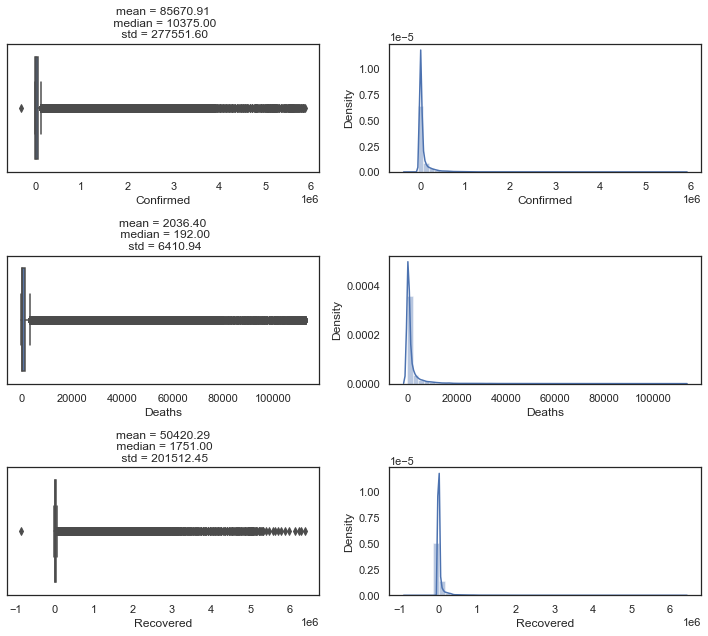

In [14]:
sns.set(style='white')
  
# Fungsi untuk membuat plot  
def observasi_num(features):  
    fig, axs = plt.subplots(3, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
	    sns.boxplot(df[kol], ax = axs[i][0])
	    sns.distplot(df[kol], ax = axs[i][1])   
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df[kol].mean(), df[kol].median(), df[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()  
  
# Memanggil fungsi untuk membuat Plot untuk data numerik  
kolom_numerik = ['Confirmed','Deaths', 'Recovered']
observasi_num(kolom_numerik)

# Pre-Modelling

## Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler

kolom_numerik = ['Confirmed','Deaths', 'Recovered']

# Statistik sebelum Standardisasi
print('Statistik Sebelum Standardisasi\n')
print(df[kolom_numerik].describe().round(1))

# Standardisasi
df_std = StandardScaler().fit_transform(df[kolom_numerik])

# Membuat DataFrame
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[kolom_numerik].columns)

# Menampilkan contoh isi data dan summary statistic
print('Contoh hasil standardisasi\n')
print(df_std.head())

print('Statistik hasil standardisasi\n')
print(df_std.describe().round(0))

Statistik Sebelum Standardisasi

       Confirmed    Deaths  Recovered
count   306429.0  306429.0   306429.0
mean     85670.9    2036.4    50420.3
std     277551.6    6410.9   201512.4
min    -302844.0    -178.0  -854405.0
25%       1042.0      13.0       11.0
50%      10375.0     192.0     1751.0
75%      50752.0    1322.0    20270.0
max    5863138.0  112385.0  6399531.0
Contoh hasil standardisasi

   Confirmed    Deaths  Recovered
0  -0.308664 -0.317646   -0.25021
1  -0.308617 -0.317646   -0.25021
2  -0.308645 -0.317646   -0.25021
3  -0.308664 -0.317646   -0.25021
4  -0.308667 -0.317646   -0.25021
Statistik hasil standardisasi

       Confirmed    Deaths  Recovered
count   306429.0  306429.0   306429.0
mean         0.0       0.0       -0.0
std          1.0       1.0        1.0
min         -1.0      -0.0       -4.0
25%         -0.0      -0.0       -0.0
50%         -0.0      -0.0       -0.0
75%         -0.0      -0.0       -0.0
max         21.0      17.0       32.0


In [16]:
# LABEL ENCODING KATEGORIK

from sklearn.preprocessing import LabelEncoder  

# Inisiasi nama kolom kategorikal
kolom_kategorikal = ['Province/State','Country/Region']

# Membuat salinan data frame
df_encode = df[kolom_kategorikal].copy()

# Melakukan labelEncoder untuk semua kolom kategorikal
for col in kolom_kategorikal:
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])

# Menampilkan data
print(df_encode.head())

   Province/State  Country/Region
0              24             126
1              60             126
2             124             126
3             194             126
4             200             126


In [17]:
# Menggabungkan Dataframe (tanpa scaling kategorik)
df_model = df_encode.merge(df_std, left_index = True, right_index=True, how = 'left')
print(df_model.head())

   Province/State  Country/Region  Confirmed    Deaths  Recovered
0              24             126  -0.308664 -0.317646   -0.25021
1              60             126  -0.308617 -0.317646   -0.25021
2             124             126  -0.308645 -0.317646   -0.25021
3             194             126  -0.308664 -0.317646   -0.25021
4             200             126  -0.308667 -0.317646   -0.25021


In [18]:
from sklearn.preprocessing import StandardScaler

# Statistik sebelum Standardisasi
print('Statistik Sebelum Standardisasi\n')
print(df_encode.describe().round(1))

# Standardisasi
df_std_kategorik = StandardScaler().fit_transform(df_encode)

# Membuat DataFrame
df_std_kategorik = pd.DataFrame(data=df_std_kategorik, index=df.index, columns=df_encode.columns)

# Menampilkan contoh isi data dan summary statistic
print('Contoh hasil standardisasi\n')
print(df_std_kategorik.head())

print('Statistik hasil standardisasi\n')
print(df_std_kategorik.describe().round(0))

Statistik Sebelum Standardisasi

       Province/State  Country/Region
count        306429.0        306429.0
mean            445.5           127.7
std             226.2            64.2
min               0.0             0.0
25%             254.0            77.0
50%             490.0           126.0
75%             669.0           178.0
max             736.0           228.0
Contoh hasil standardisasi

   Province/State  Country/Region
0       -1.863431       -0.026917
1       -1.704275       -0.026917
2       -1.421333       -0.026917
3       -1.111864       -0.026917
4       -1.085338       -0.026917
Statistik hasil standardisasi

       Province/State  Country/Region
count        306429.0        306429.0
mean              0.0            -0.0
std               1.0             1.0
min              -2.0            -2.0
25%              -1.0            -1.0
50%               0.0            -0.0
75%               1.0             1.0
max               1.0             2.0


In [19]:
# Menggabungkan Dataframe (dengan scaling kategorik)
df_model2 = df_std_kategorik.merge(df_std, left_index = True, right_index=True, how = 'left')
print(df_model2.head())

   Province/State  Country/Region  Confirmed    Deaths  Recovered
0       -1.863431       -0.026917  -0.308664 -0.317646   -0.25021
1       -1.704275       -0.026917  -0.308617 -0.317646   -0.25021
2       -1.421333       -0.026917  -0.308645 -0.317646   -0.25021
3       -1.111864       -0.026917  -0.308664 -0.317646   -0.25021
4       -1.085338       -0.026917  -0.308667 -0.317646   -0.25021


# Modelling

## K-Means

## K-Medoids

##### Coba 1

In [20]:
pip install scikit-learn-extra

Note: you may need to restart the kernel to use updated packages.


In [21]:
df_coba1 = df_model2.iloc[:,[2,3,4]]
df_coba1.head()

,Confirmed,Deaths,Recovered
0,-0.308664,-0.317646,-0.25021
1,-0.308617,-0.317646,-0.25021
2,-0.308645,-0.317646,-0.25021
3,-0.308664,-0.317646,-0.25021
4,-0.308667,-0.317646,-0.25021


In [22]:
x = df_coba1.values
x

array([[-0.30866351, -0.31764565, -0.2502097 ],
       [-0.30861667, -0.31764565, -0.2502097 ],
       [-0.30864549, -0.31764565, -0.2502097 ],
       ...,
       [-0.3037527 , -0.31748967, -0.24363937],
       [ 0.00677024, -0.04654604,  0.16559656],
       [ 1.10209627,  0.3455969 , -0.2502097 ]])

In [23]:
from sklearn_extra.cluster import KMedoids

In [24]:
# do "Elbow Method" to find suitable number for K as cluster

inertia_list = []
for num_clusters in range(1, 6):
    kmedoids_model = KMedoids(n_clusters=num_clusters)
    kmedoids_model.fit(x)
    inertia_list.append(kmedoids_model.inertia_)
    print(f"The inertia of {num_clusters} clusters : {kmedoids_model.inertia_}")

MemoryError: Unable to allocate 700. GiB for an array with shape (306429, 306429) and data type float64

## DBSCAN

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8c4be797-6ded-4ee5-84e8-c5f3044bd915' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>